# Diamond Price Prediction

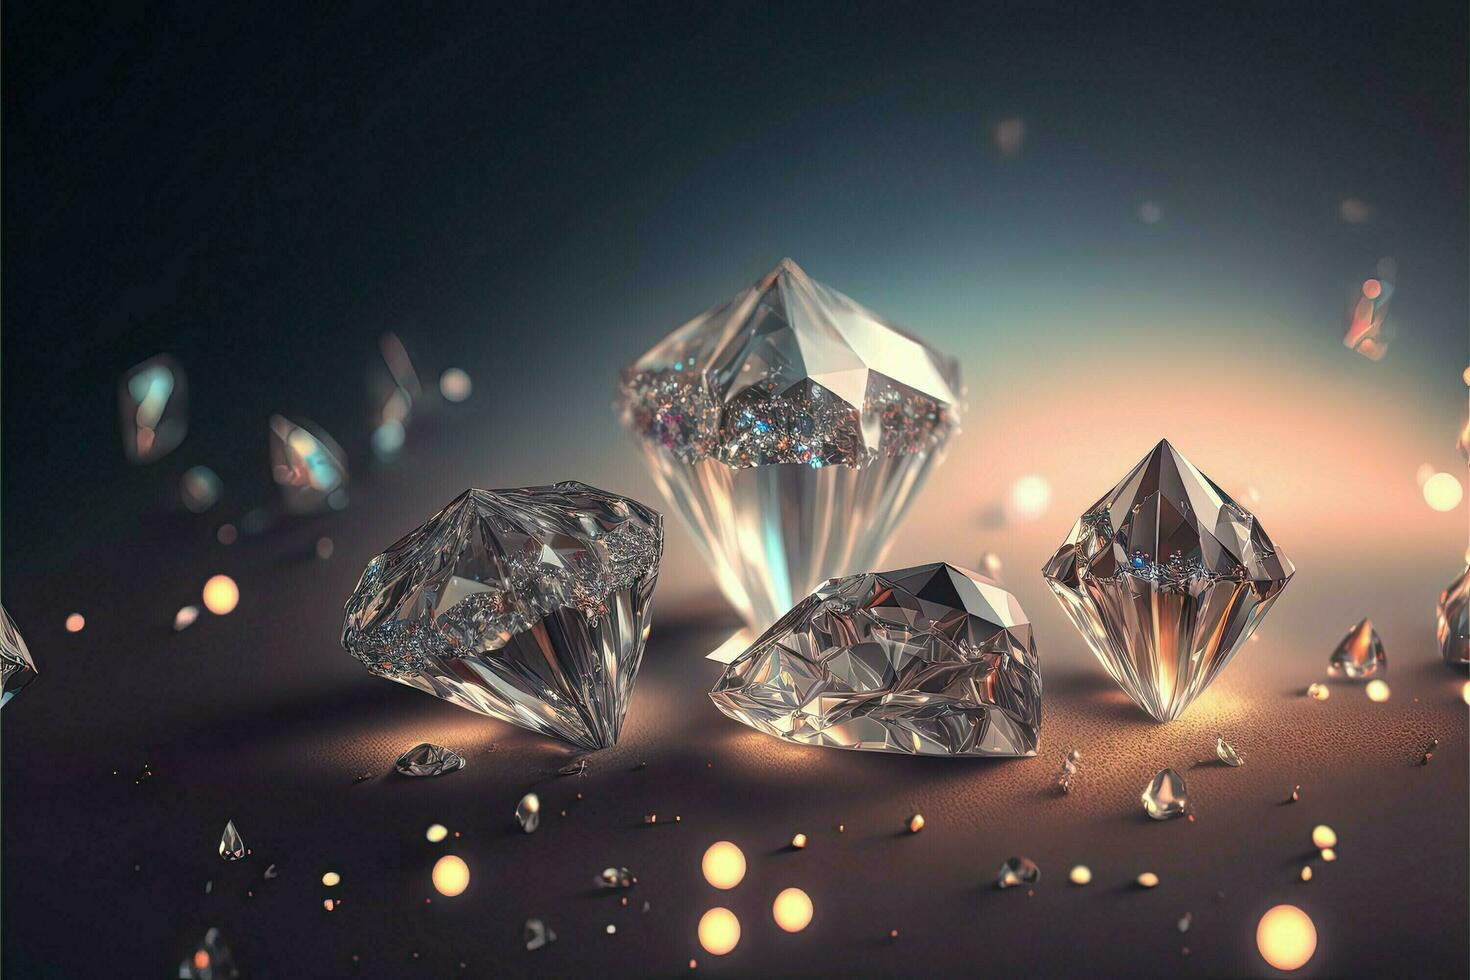

## About the Data

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

* carat (0.2-5.01): The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points.

* cut (Fair, Good, Very Good, Premium, Ideal): The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade.

* color (from J (worst) to D (best)): The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

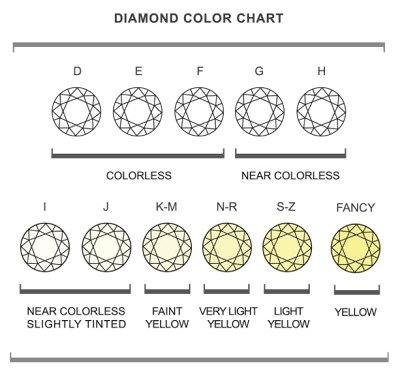

* clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

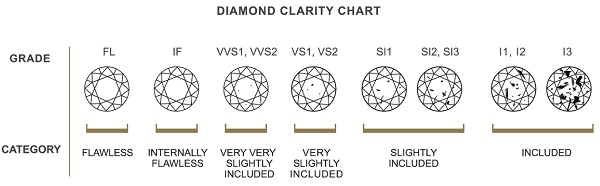

* depth (43-79): It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above.

* table (43-95): It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous.

* price ($$326 - $18826): It is the price of the diamond in US dollars. It is our very target column in the dataset.

* x (0 - 10.74): Length of the diamond (in mm)

* y (0 - 58.9): Width of the diamond (in mm)

* z (0 - 31.8): Depth of the diamond (in mm)

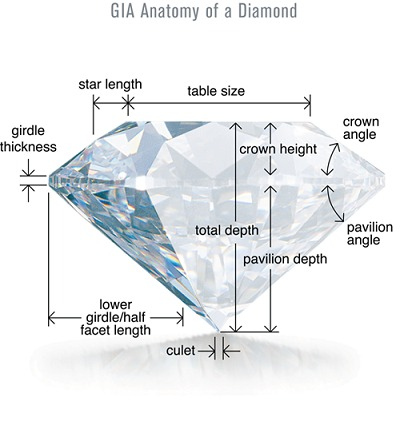

## Read Data

In [86]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "png"

In [87]:
data = pd.read_csv('data/diamonds.csv')
data

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [89]:
data = data.drop("Unnamed: 0", axis=1)

In [90]:
print(data.isnull().sum())

print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Number of duplicate rows: 146


In [91]:
data = data.drop_duplicates()
print(f"\nNumber of duplicate rows after removing: {data.duplicated().sum()}")


Number of duplicate rows after removing: 0


## Exploratory Data Analysis

### What is the distribution of diamond prices?

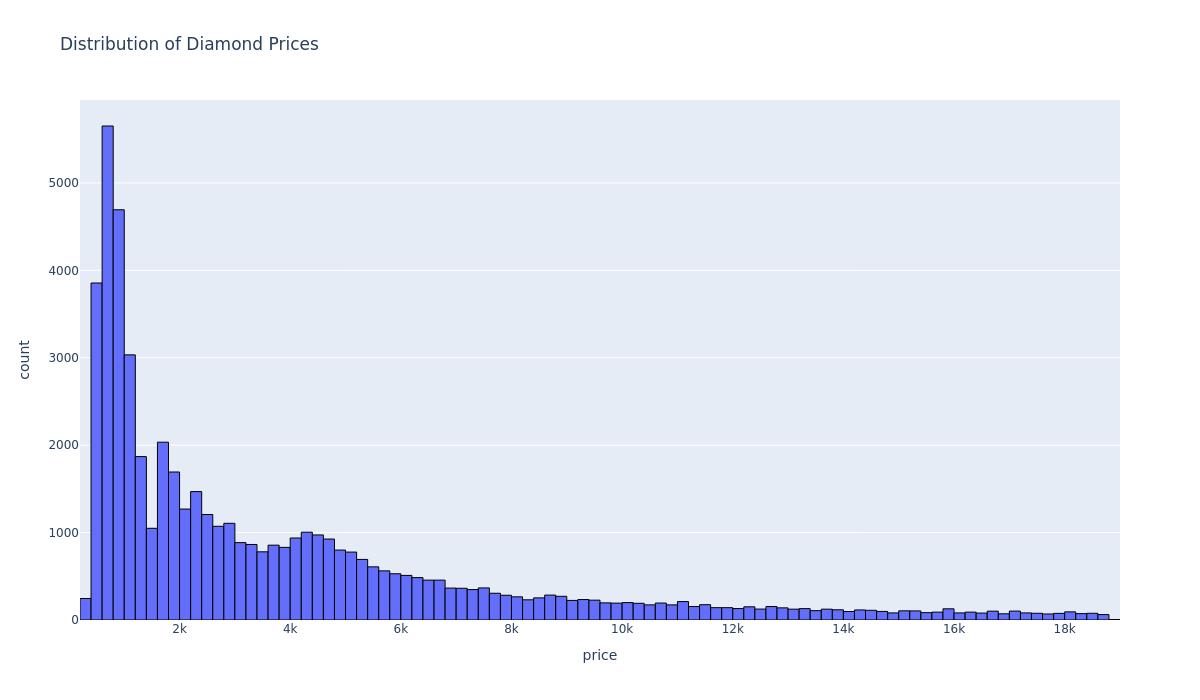

In [92]:
fig = px.histogram(
    data,
    x='price',
    width=1200,
    height=700,
    title='Distribution of Diamond Prices'
)
fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.show()

The price distribution is right-skewed, indicating most diamonds are priced below $5,000, while only a few exceed this price.

### What are the distributions of carat, cut, color, and clarity?

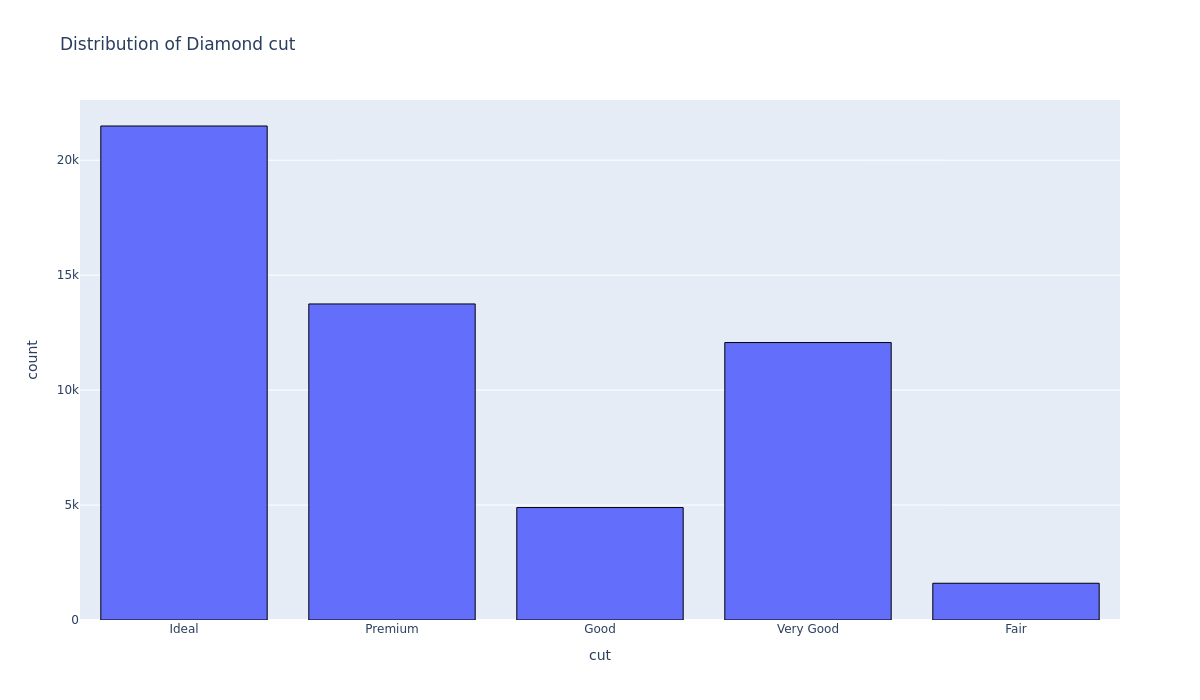

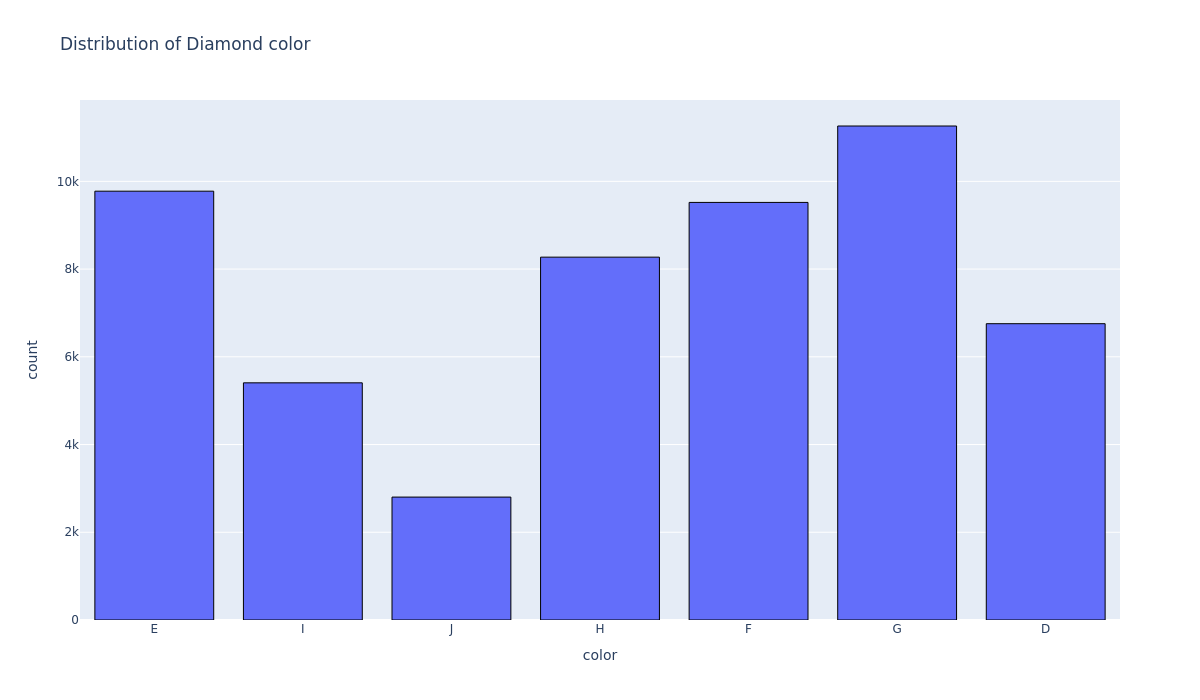

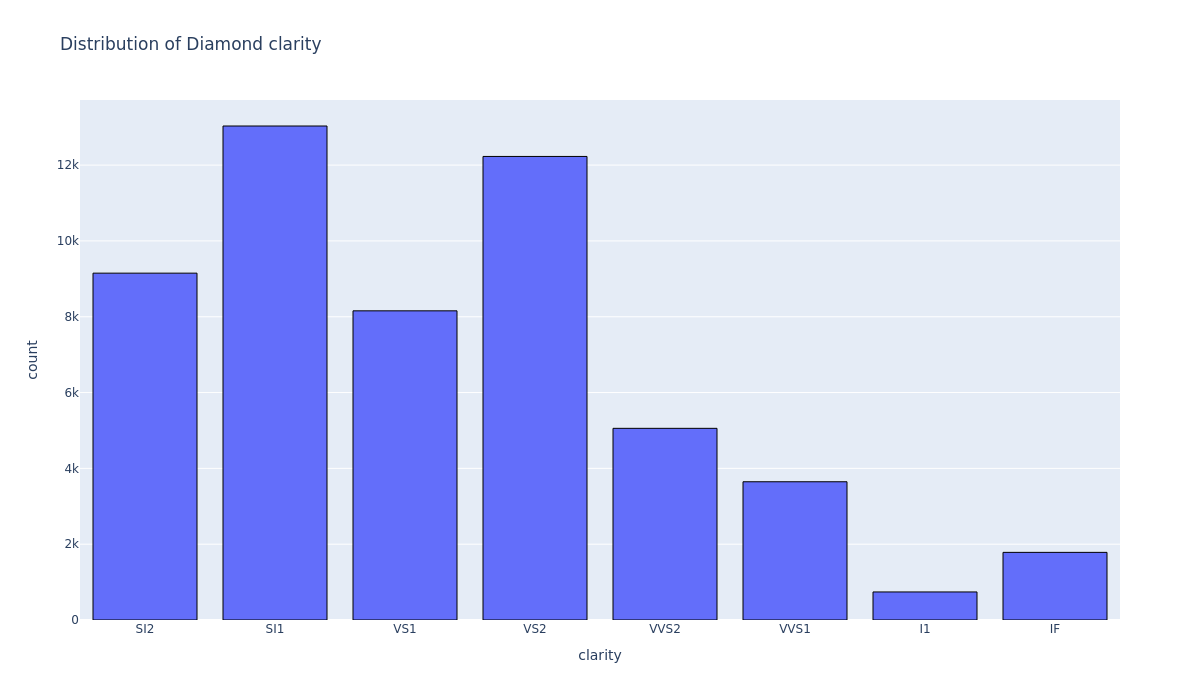

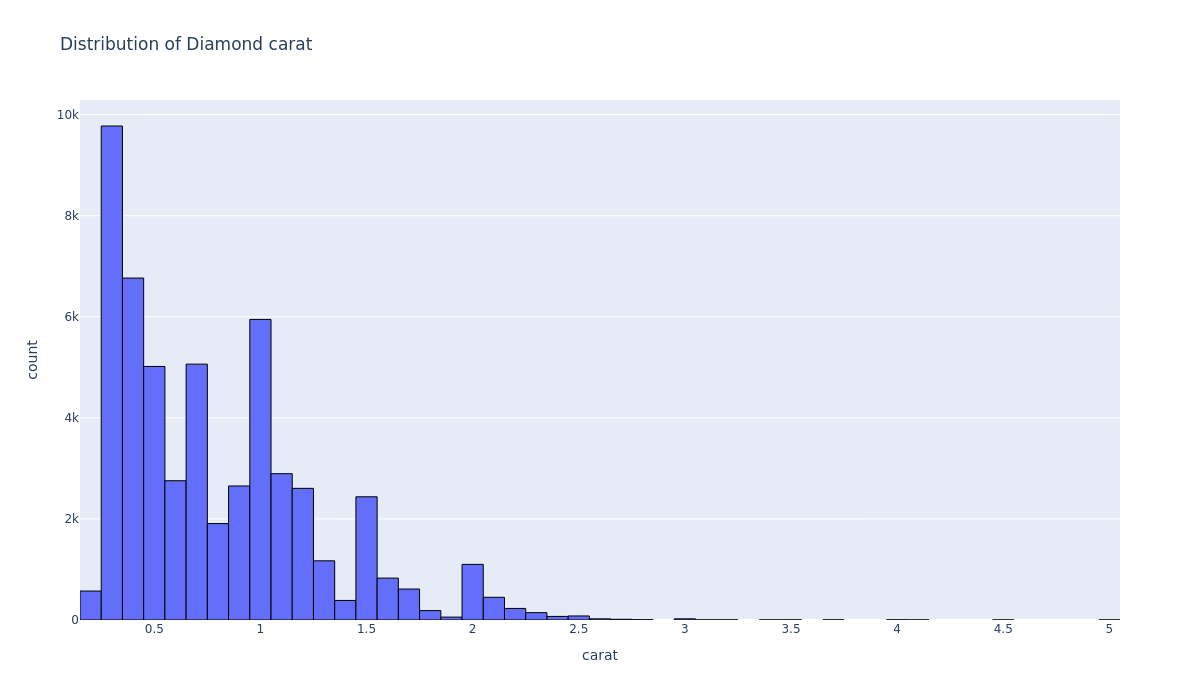

In [93]:
fig_1 = px.histogram(
    data,
    x='cut',
    width=1200,
    height=700,
    title='Distribution of Diamond cut'
)
fig_1.update_traces(marker_line_width=1, marker_line_color="black")

fig_2 = px.histogram(
    data,
    x='color',
    width=1200,
    height=700,
    title='Distribution of Diamond color'
)
fig_2.update_traces(marker_line_width=1, marker_line_color="black")

fig_3 = px.histogram(
    data,
    x='clarity',
    width=1200,
    height=700,
    title='Distribution of Diamond clarity'
)
fig_3.update_traces(marker_line_width=1, marker_line_color="black")

fig_4 = px.histogram(
    data,
    nbins=50,
    x='carat',
    width=1200,
    height=700,
    title='Distribution of Diamond carat',
)

fig_4.update_traces(marker_line_width=1, marker_line_color="black")


fig_1.show()
fig_2.show()
fig_3.show()
fig_4.show()

Insight:

* Cut: Most diamonds are in the Ideal and Premium cut categories.
* Color: A higher frequency of diamonds is observed in the middle range, particularly G, H, and I colors.
* Clarity: Diamonds are predominantly in the SI1 and VS2 clarity categories.

How does carat affect diamond prices?

In [94]:
data

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53794 rows x 10 columns]

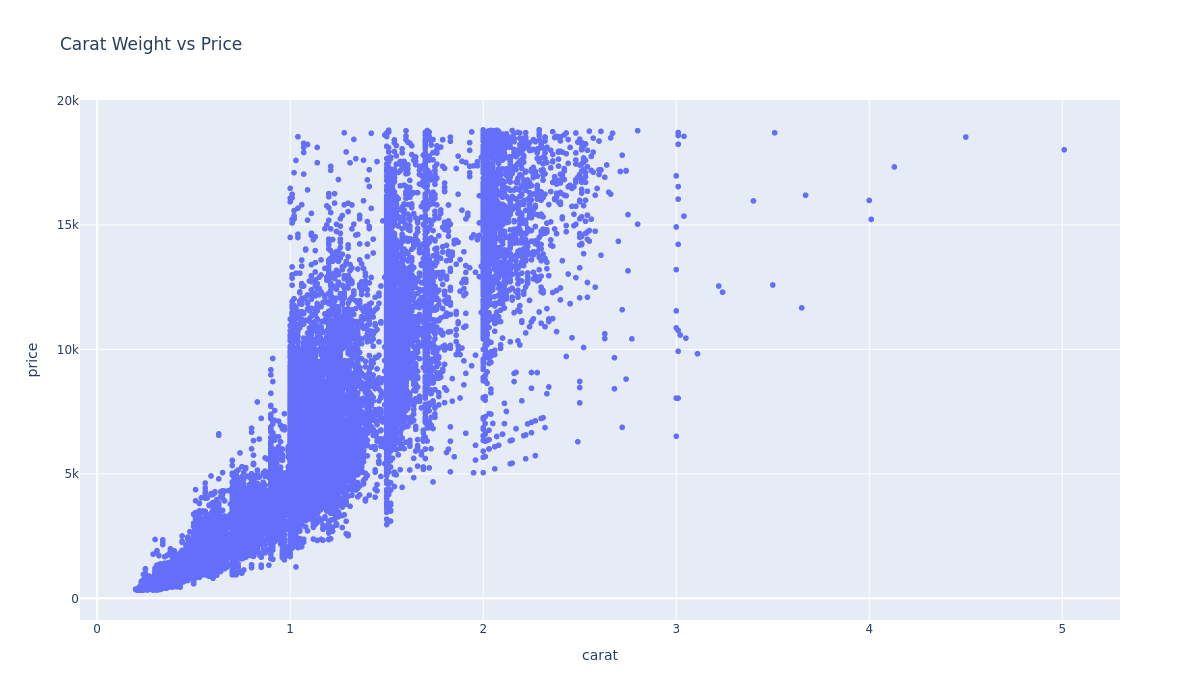

In [95]:
fig = px.scatter(
    data,
    x='carat',
    y='price',
    width=1200,
    height=700,
    title='Carat Weight vs Price'
)
fig.show()

A strong positive correlation exists between carat and price, indicating larger diamonds tend to be more expensive. However, the relationship is non-linear, as larger carat sizes significantly inflate prices.

### How do cut, color, and clarity influence diamond prices?

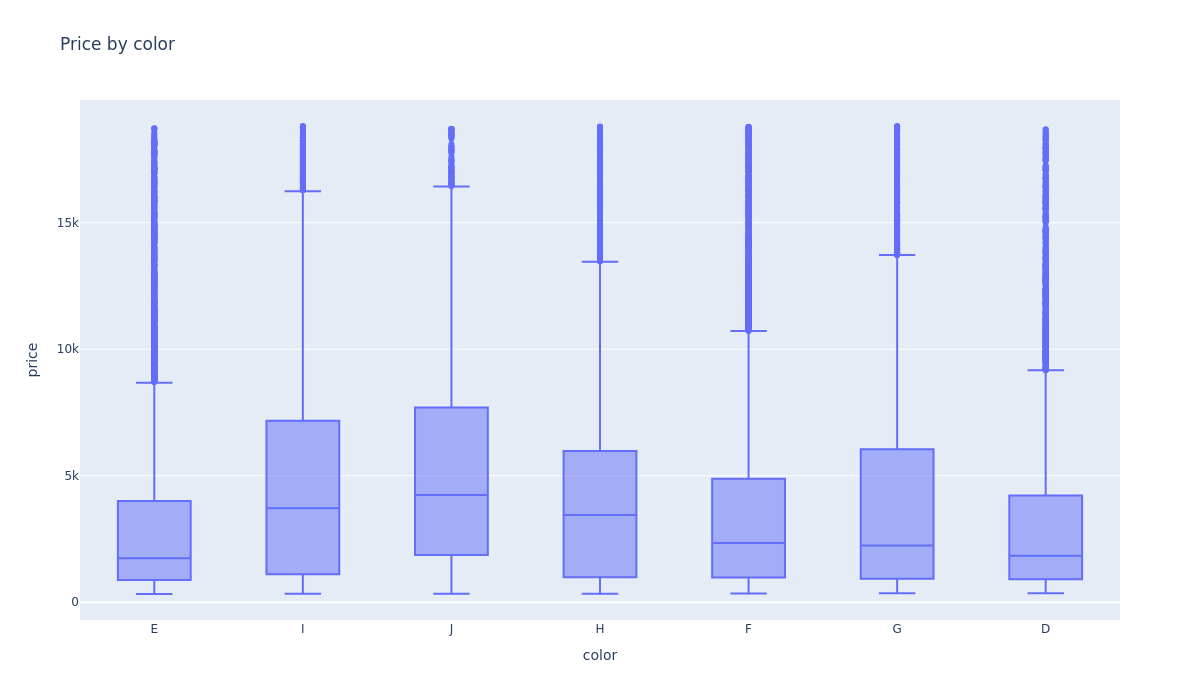

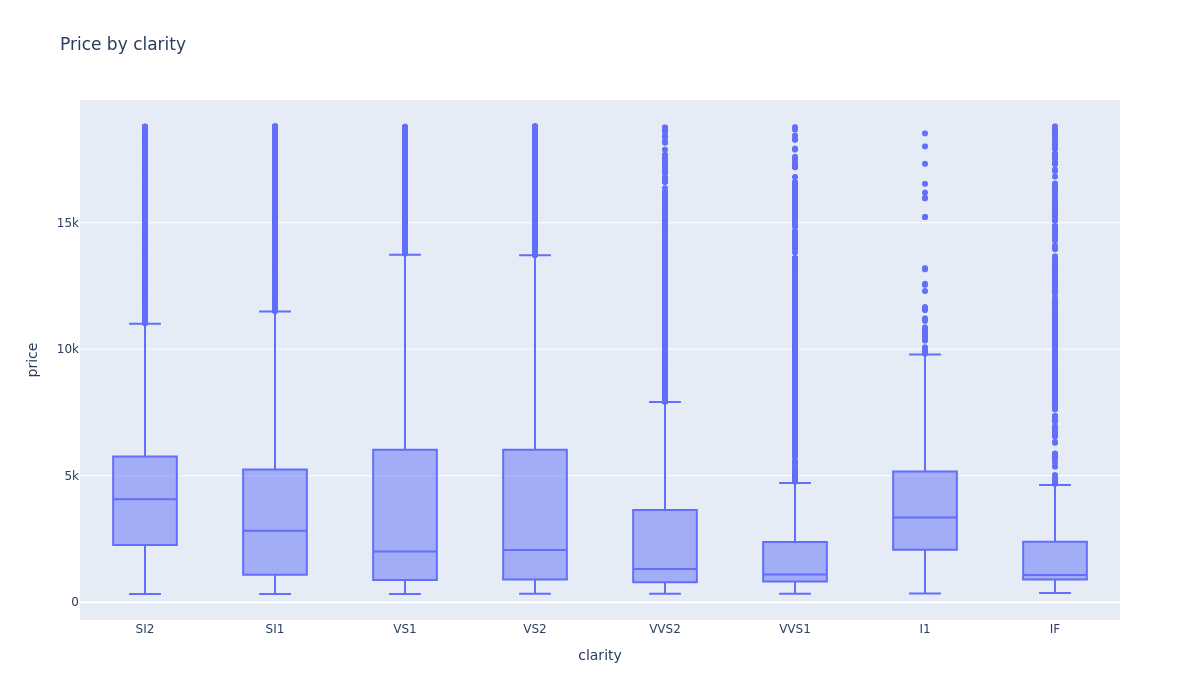

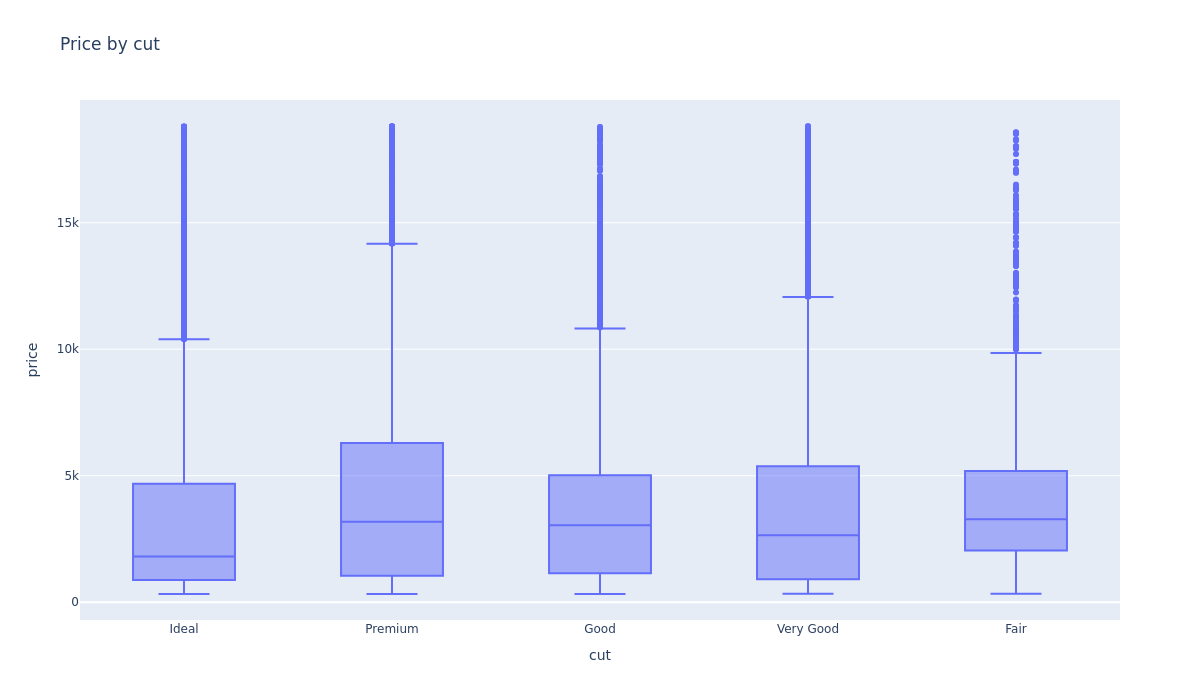

In [96]:
fig = px.box(
    data,
    x='color',
    y='price',
    width=1200,
    height=700,
    title='Price by color'
)
fig_1 = px.box(
    data,
    x='clarity',
    y='price',
    width=1200,
    height=700,
    title='Price by clarity'
)
fig_2 = px.box(
    data,
    x='cut',
    y='price',
    width=1200,
    height=700,
    title='Price by cut'
)
fig.show()
fig_1.show()
fig_2.show()

Price by Cut:
* The Premium cut generally commands the highest average prices, while the Fair cut has the lowest.

Price by Color:
* Surprisingly, diamonds with lower color grades (such as J) command higher prices than those with better grades (like D). This may be due to larger sizes available in those categories.

Price by Clarity:
* Diamonds with better clarity (IF, VVS1) command higher prices, but the price gap narrows for mid-range clarity diamonds (SI1, VS2).

### Do carat, cut, color, and clarity interact to influence prices?

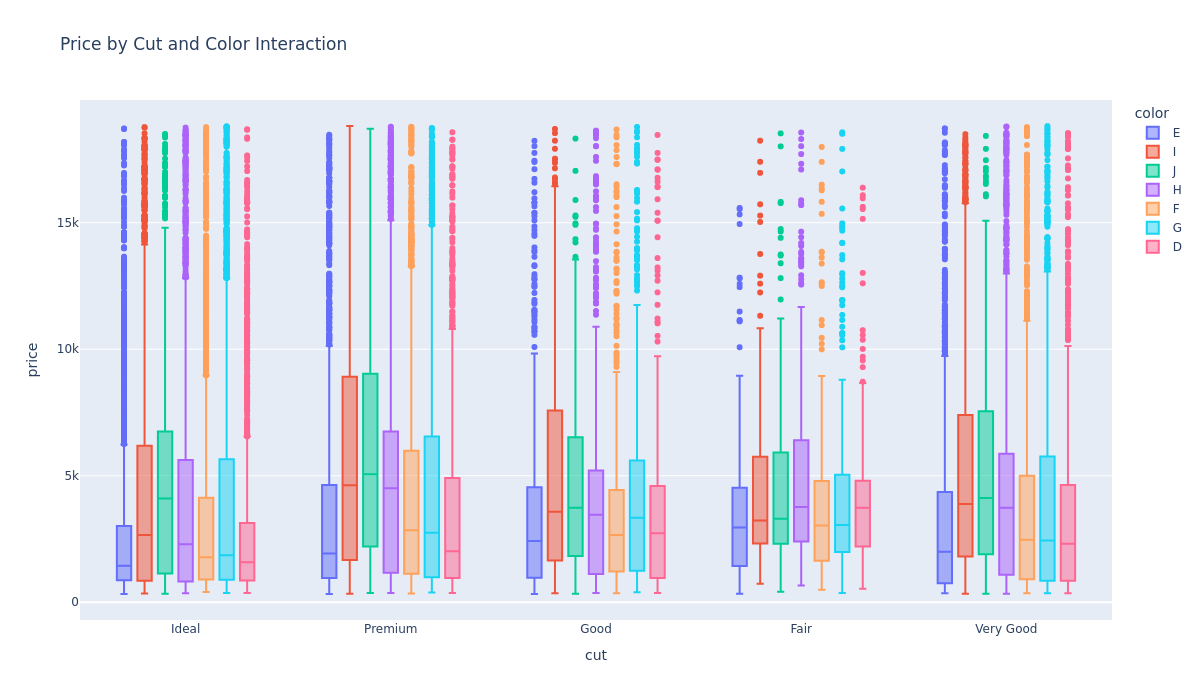

In [97]:
fig = px.box(
    data,
    x='cut',
    y='price',
    width=1200,
    height=700,
    title='Price by Cut and Color Interaction',
    color='color'
)
fig.show()

Again we get a paradox. Diamonds with an ideal cut and ideal color are cheaper than others. Perhaps this is due to the weight of the diamond?

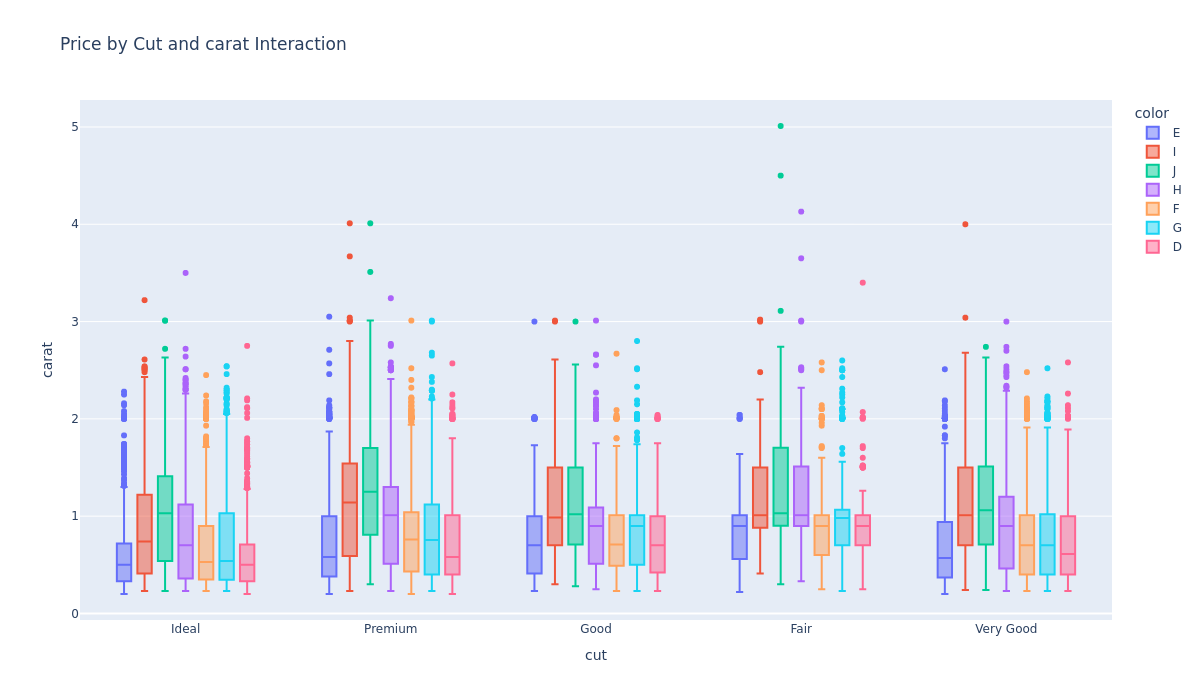

In [98]:
fig = px.box(
    data,
    x='cut',
    y='carat',
    width=1200,
    height=700,
    title='Price by Cut and carat Interaction',
    color='color'
)
fig.show()

What is the price difference between diamonds of the same cut, but different clarity?

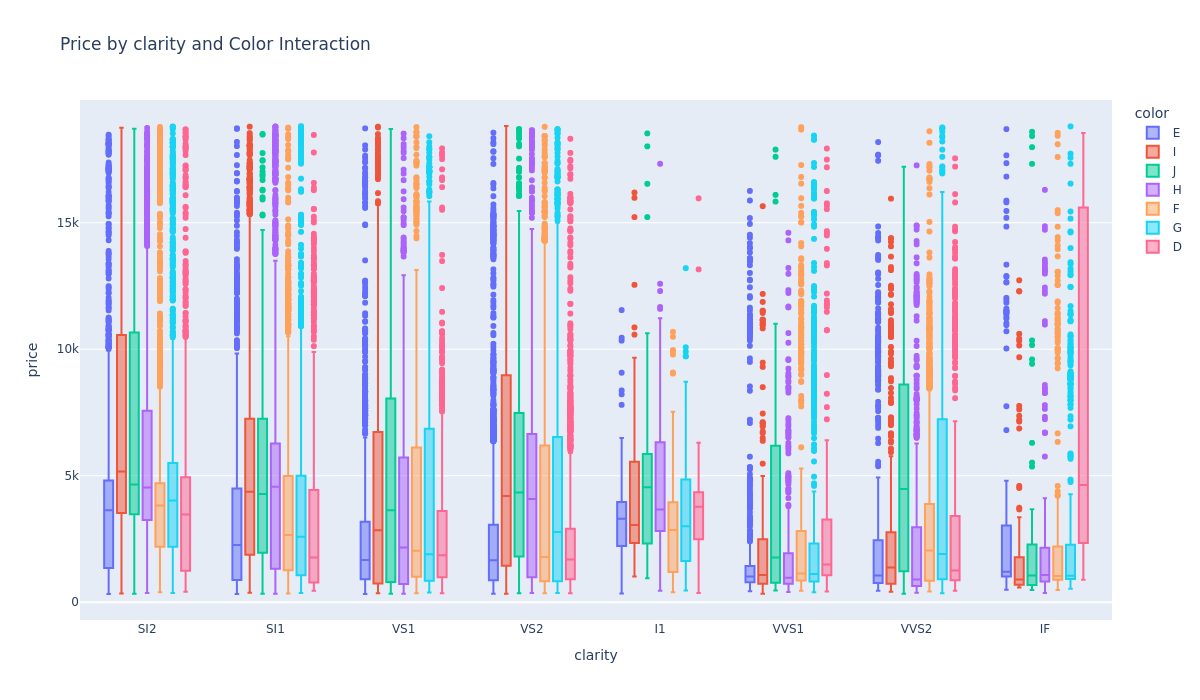

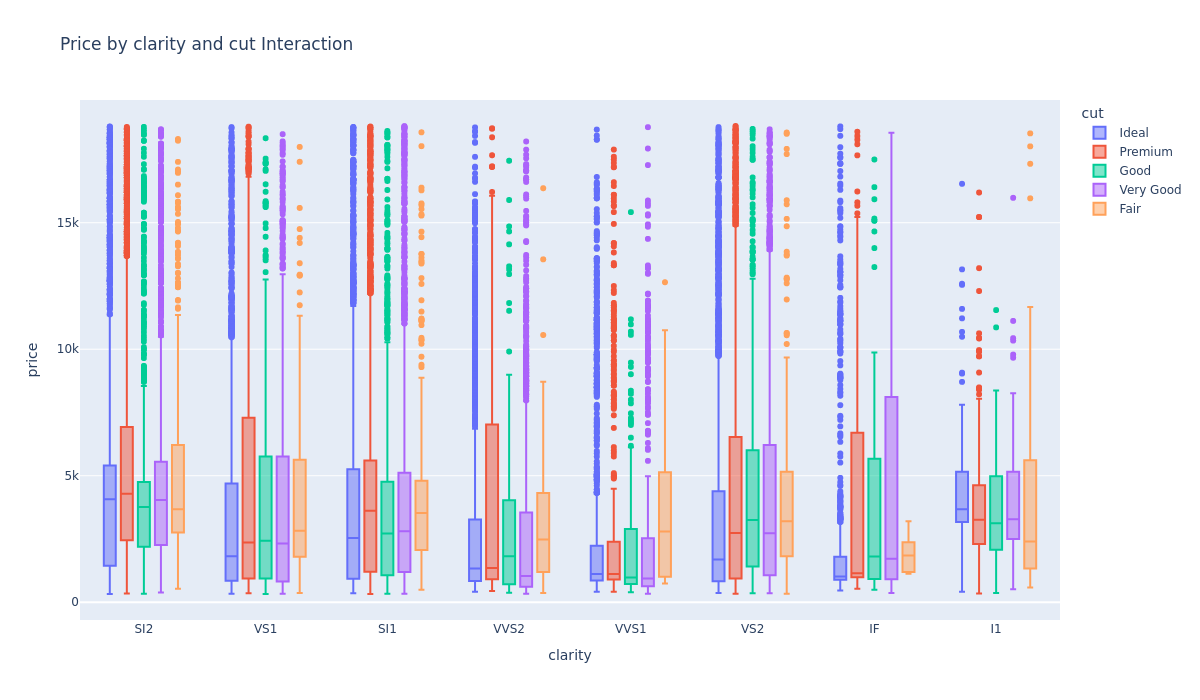

In [99]:
fig = px.box(
    data,
    x='clarity',
    y='price',
    width=1200,
    height=700,
    title='Price by clarity and Color Interaction',
    color='color'
)
fig_1 = px.box(
    data,
    x='clarity',
    y='price',
    width=1200,
    height=700,
    title='Price by clarity and cut Interaction',
    color='cut'
)
fig.show()
fig_1.show()

How does price per carat vary across cut, color, and clarity categories?

In [100]:
data['price_per_carat'] = data['price'] / data['carat']
data

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       price_per_carat  
0          1417.391304  
1          1552.380952  
2          1421.739130  
3          1151.724138  
4          1080.645161  
...                ...  
53935      3829.166667  
53936      3829.166667  
53937      3938.571429  
53938      3205.813953  
53939      3676.000000  

[53794 rows x 11 columns]

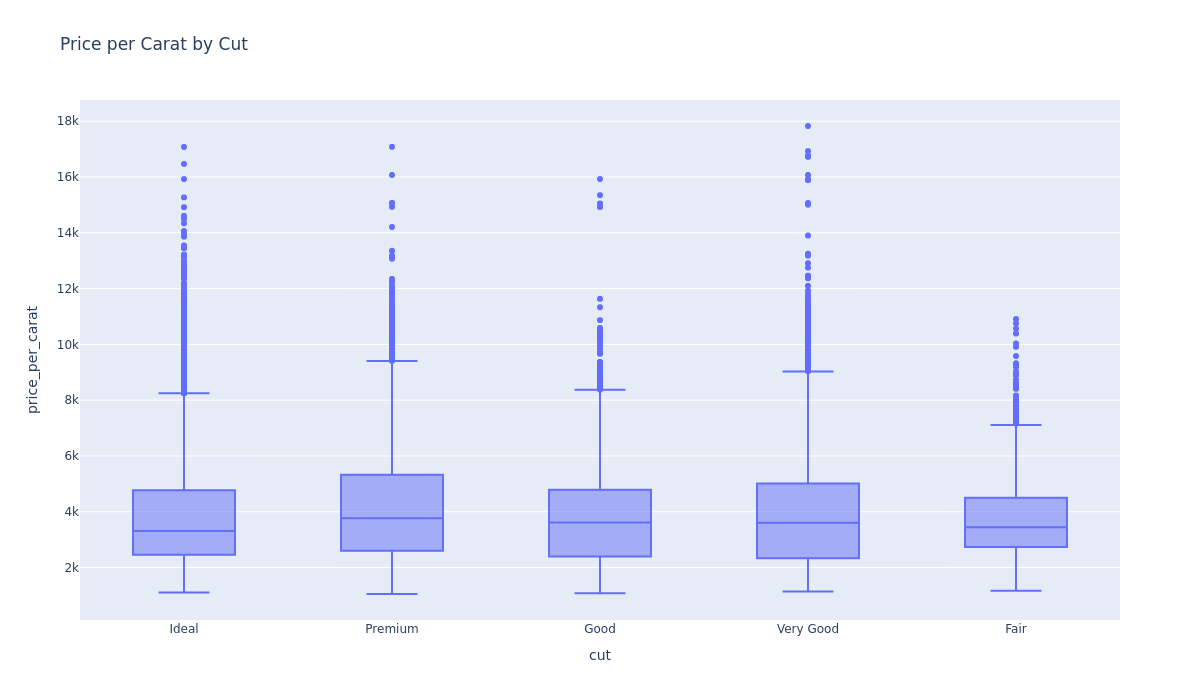

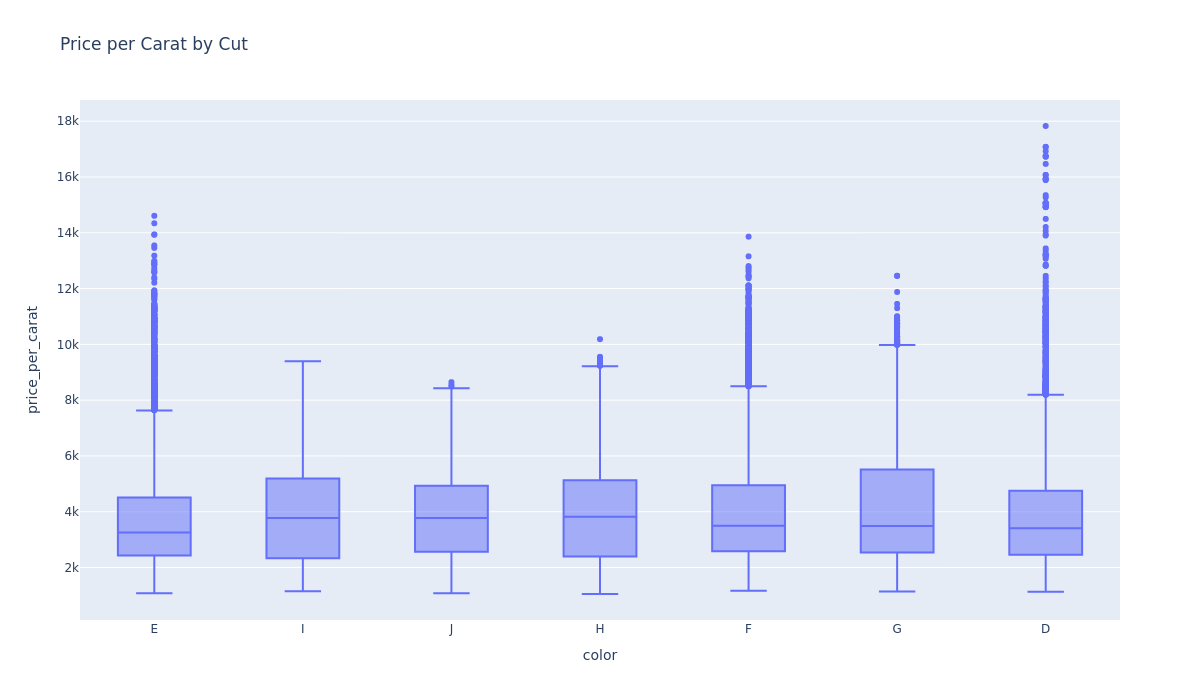

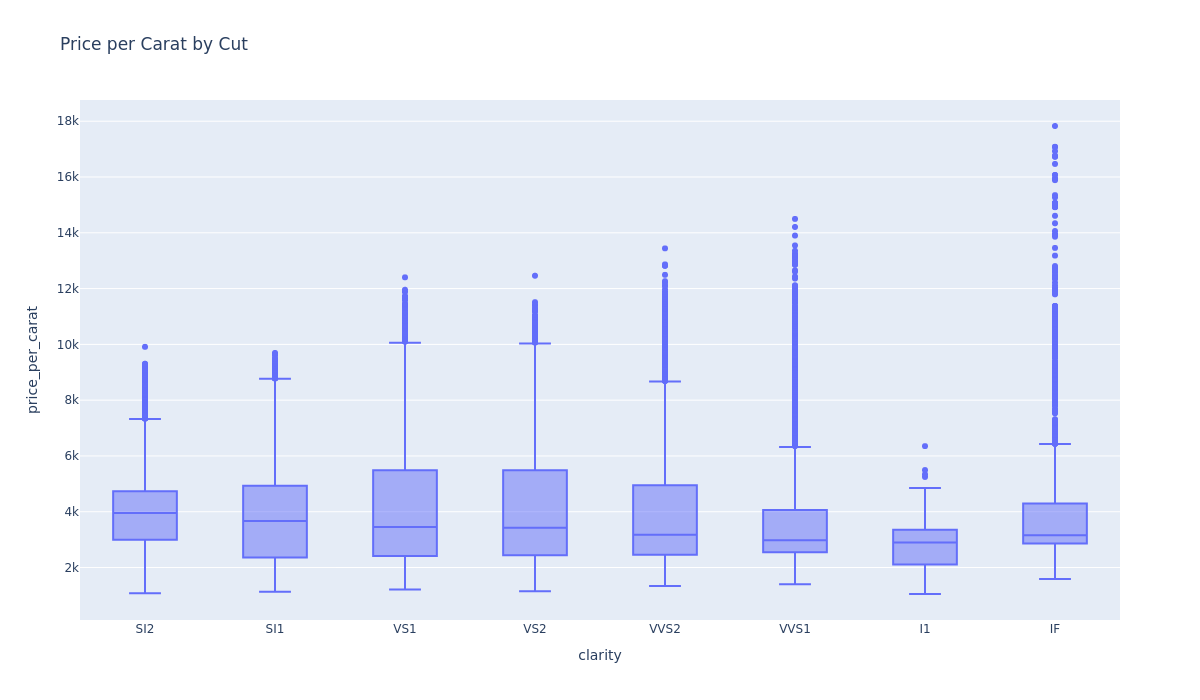

In [101]:
fig = px.box(
    data,
    x='cut',
    y='price_per_carat',
    width=1200,
    height=700,
    title='Price per Carat by Cut'
)
fig_1 = px.box(
    data,
    x='color',
    y='price_per_carat',
    width=1200,
    height=700,
    title='Price per Carat by Cut'
)
fig_2 = px.box(
    data,
    x='clarity',
    y='price_per_carat',
    width=1200,
    height=700,
    title='Price per Carat by Cut'
)
fig.show()
fig_1.show()
fig_2.show()

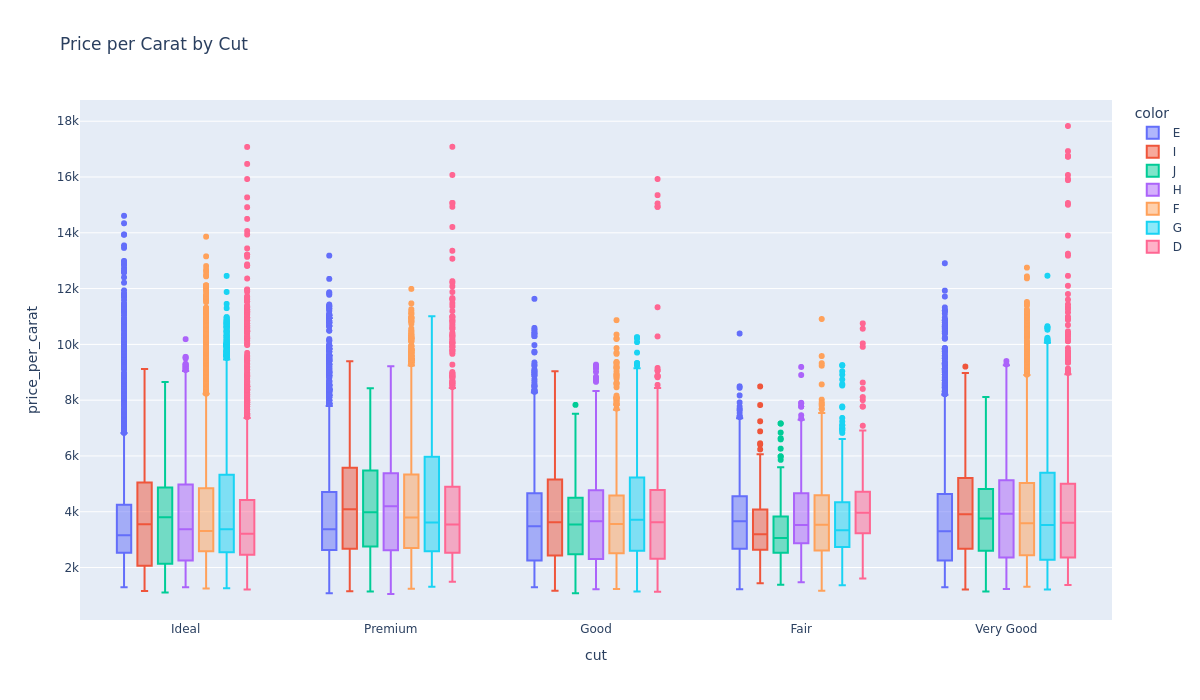

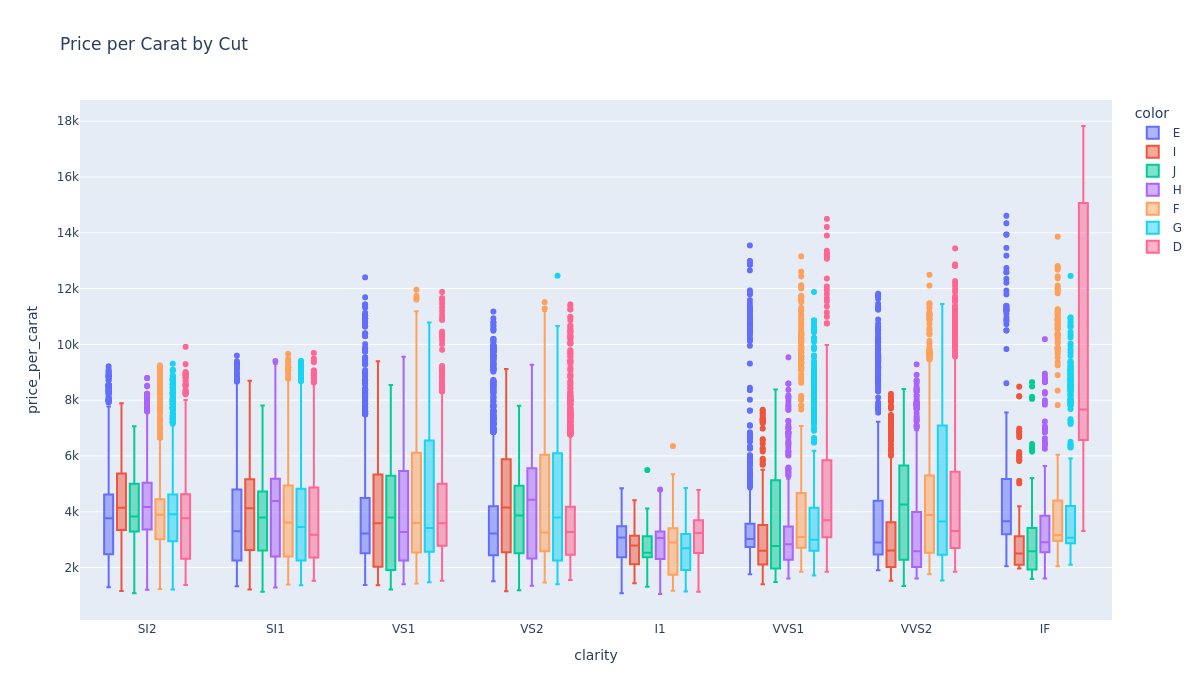

In [102]:
fig = px.box(
    data,
    x='cut',
    y='price_per_carat',
    width=1200,
    height=700,
    title='Price per Carat by Cut',
    color='color'
)
fig_1 = px.box(
    data,
    x='clarity',
    y='price_per_carat',
    width=1200,
    height=700,
    title='Price per Carat by Cut',
    color='color'
)
fig.show()
fig_1.show()

Price distributions vary widely in cut categories, especially in Premium and Ideal, which indicate a diverse selection. The wider price distribution in lower color grades (J, I, H) suggests that larger, affordable options are available despite color quality.

### How do multiple features interact to influence diamond prices?

In [103]:
data

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       price_per_carat  
0          1417.391304  
1          1552.380952  
2          1421.739130  
3          1151.724138  
4          1080.645161  
...                ...  
53935      3829.166667  
53936      3829.166667  
53937      3938.571429  
53938      3205.813953  
53939      3676.000000  

[53794 rows x 11 columns]

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` be

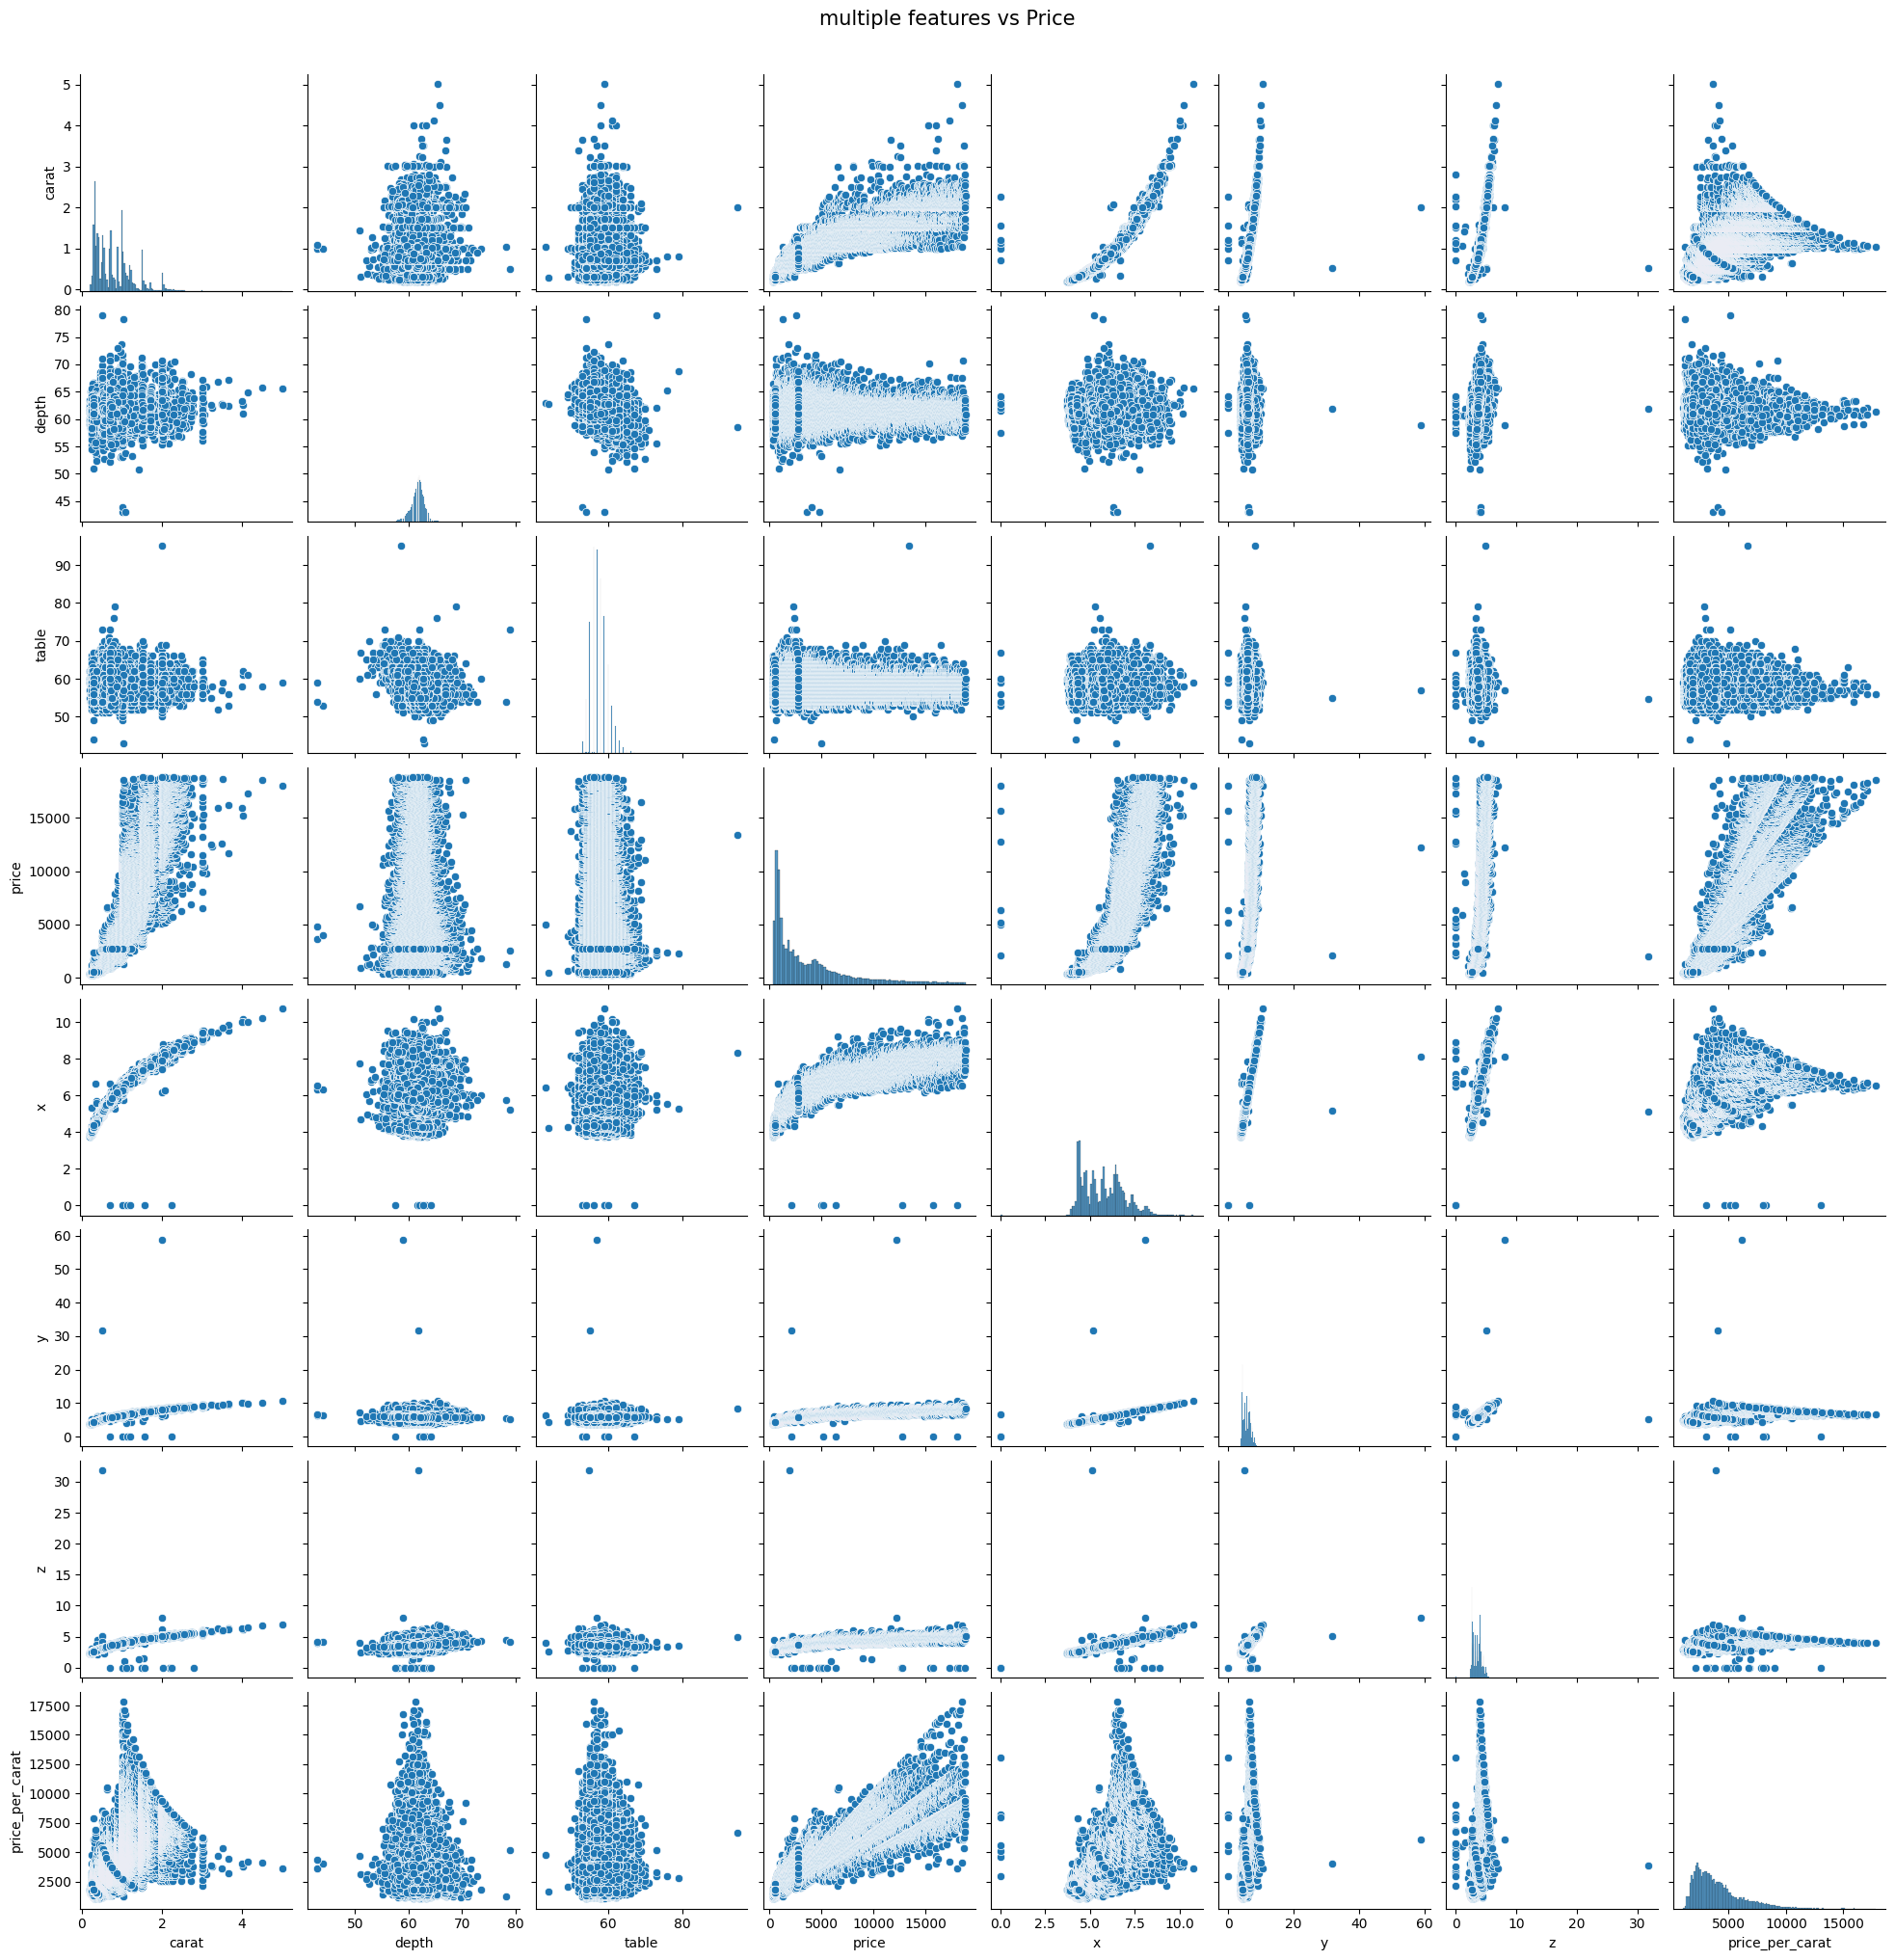

In [104]:
sns.pairplot(data, kind='scatter', palette='YlGnBu')
plt.suptitle('multiple features vs Price', y=1.02, fontsize=15)
plt.show()

Insights:
* **x, y, z (Length, Width, Depth): The scatter plots between these dimensional variables show a linear relationship between x (length), y (width), and z (depth). This suggests that as the length or width of the diamond increases, the depth tends to increase as well, implying consistency in the diamond's proportions**. However, there are some diamonds with higher lengths (x) that don’t necessarily have corresponding large depths (z), which might indicate flatter or more elongated diamond shapes.

* **cut, color, clarity: The categorical attributes (e.g., cut, color, clarity) are likely represented in the diagonal with separate distributions. We can observe how these categorical variables are distributed and how they overlap with other features.** For example, diamonds with higher clarity grades (IF, VVS1) may show a slight tendency toward higher length or width values. ** Similarly, diamonds with better cut or color grades might cluster within a specific range of dimensions (length, width, depth), showing that higher-quality diamonds may follow certain physical trends.